# KNN 

#### KNN Classification

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from haversine import haversine, Unit
from scipy.stats import skew, kurtosis
sns.set() 
%matplotlib inline

In [2]:
# Importing the provided dataset from the data folder.
df = pd.read_csv('nyc_taxi_trip_duration Dataset.csv')

In [3]:
df=df[df.trip_duration!=df.trip_duration.max()]
df=df[df.trip_duration!=df.trip_duration.min()]

In [4]:
df['trip_duration_hour']=df['trip_duration']/3600

In [5]:
df.passenger_count.value_counts()

1    517403
2    105096
5     38926
3     29692
6     24107
4     14050
0        32
7         1
9         1
Name: passenger_count, dtype: int64

In [6]:
df=df[df.passenger_count<=6]
df=df[df.passenger_count!=0]

In [7]:
# Changing the pickup_datetime and dropoff_datetime from object to datetime datatype
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

In [8]:
# Creating features based on month
df['pickup_by_month'] = df['pickup_datetime'].dt.month
df['dropoff_by_month'] = df['dropoff_datetime'].dt.month

In [9]:
# Creating features based on month
df['pickup_by_month'] = df['pickup_datetime'].dt.month
df['dropoff_by_month'] = df['dropoff_datetime'].dt.month

In [10]:
df['pickup_day']=df['pickup_datetime'].dt.day
df['dropoff_day']=df['dropoff_datetime'].dt.day
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

In [11]:
df['pickup_month'].value_counts()

3    128307
4    125627
5    124194
2    119354
6    117404
1    114388
Name: pickup_month, dtype: int64

In [12]:
df['dropoff_month'].value_counts()

3    128275
4    125626
5    124229
2    119351
6    117378
1    114362
7        53
Name: dropoff_month, dtype: int64

In [13]:
print(df[df.dropoff_month==7].pickup_datetime.dt.month.value_counts())
print(df[df.dropoff_month==7].pickup_datetime.dt.day.value_counts())

6    53
Name: pickup_datetime, dtype: int64
30    53
Name: pickup_datetime, dtype: int64


In [14]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_hour,pickup_by_month,dropoff_by_month,pickup_day,dropoff_day,pickup_month,dropoff_month
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0.111111,2,2,29,29,2,2
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,0.305556,3,3,11,11,3,3
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,0.454167,2,2,21,21,2,2
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,0.316944,1,1,5,5,1,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,0.235556,2,2,17,17,2,2


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729274 entries, 0 to 729321
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  729274 non-null  object        
 1   vendor_id           729274 non-null  int64         
 2   pickup_datetime     729274 non-null  datetime64[ns]
 3   dropoff_datetime    729274 non-null  datetime64[ns]
 4   passenger_count     729274 non-null  int64         
 5   pickup_longitude    729274 non-null  float64       
 6   pickup_latitude     729274 non-null  float64       
 7   dropoff_longitude   729274 non-null  float64       
 8   dropoff_latitude    729274 non-null  float64       
 9   store_and_fwd_flag  729274 non-null  object        
 10  trip_duration       729274 non-null  int64         
 11  trip_duration_hour  729274 non-null  float64       
 12  pickup_by_month     729274 non-null  int64         
 13  dropoff_by_month    729274 no

In [16]:
df=df.drop(['id', 'pickup_datetime', 'dropoff_datetime'],axis=1)

In [17]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_hour,pickup_by_month,dropoff_by_month,pickup_day,dropoff_day,pickup_month,dropoff_month
0,2,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0.111111,2,2,29,29,2,2
1,1,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,0.305556,3,3,11,11,3,3
2,2,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,0.454167,2,2,21,21,2,2
3,2,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,0.316944,1,1,5,5,1,1
4,1,1,-74.017120,40.708469,-73.988182,40.740631,N,848,0.235556,2,2,17,17,2,2


In [18]:
type_dummy=pd.get_dummies(df.store_and_fwd_flag, prefix='store_and_fwd_flag')

In [19]:
type_dummy.head()

,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [20]:
df=pd.concat([df,type_dummy],axis=1)

In [21]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_hour,pickup_by_month,dropoff_by_month,pickup_day,dropoff_day,pickup_month,dropoff_month,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,2,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0.111111,2,2,29,29,2,2,1,0
1,1,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,0.305556,3,3,11,11,3,3,1,0
2,2,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,0.454167,2,2,21,21,2,2,1,0
3,2,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,0.316944,1,1,5,5,1,1,1,0
4,1,1,-74.017120,40.708469,-73.988182,40.740631,N,848,0.235556,2,2,17,17,2,2,1,0


In [22]:
df=df.drop(['store_and_fwd_flag'],axis=1)

In [23]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,trip_duration_hour,pickup_by_month,dropoff_by_month,pickup_day,dropoff_day,pickup_month,dropoff_month,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,2,1,-73.953918,40.778873,-73.963875,40.771164,400,0.111111,2,2,29,29,2,2,1,0
1,1,2,-73.988312,40.731743,-73.994751,40.694931,1100,0.305556,3,3,11,11,3,3,1,0
2,2,2,-73.997314,40.721458,-73.948029,40.774918,1635,0.454167,2,2,21,21,2,2,1,0
3,2,6,-73.961670,40.759720,-73.956779,40.780628,1141,0.316944,1,1,5,5,1,1,1,0
4,1,1,-74.017120,40.708469,-73.988182,40.740631,848,0.235556,2,2,17,17,2,2,1,0


In [24]:
#seperating independent and dependent variables
x = df.drop(['trip_duration_hour', 'vendor_id','passenger_count','store_and_fwd_flag_N','store_and_fwd_flag_Y'], axis=1)
y = df['vendor_id']
x.shape, y.shape

((729274, 11), (729274,))

In [25]:
## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [26]:
x = pd.DataFrame(x_scaled, columns = x.columns)

In [27]:
x.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_by_month,dropoff_by_month,pickup_day,dropoff_day,pickup_month,dropoff_month
0,0.856226,0.353352,0.856048,0.731696,0.004607,0.2,0.166667,0.933333,0.933333,0.2,0.166667
1,0.855612,0.350606,0.855497,0.725202,0.012710,0.4,0.333333,0.333333,0.333333,0.4,0.333333
2,0.855451,0.350007,0.856331,0.732015,0.018903,0.2,0.166667,0.666667,0.666667,0.2,0.166667
3,0.856087,0.352236,0.856174,0.732502,0.013185,0.0,0.000000,0.133333,0.133333,0.0,0.000000
4,0.855098,0.349251,0.855614,0.729095,0.009793,0.2,0.166667,0.533333,0.533333,0.2,0.166667


In [28]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 30, stratify=y)

In [29]:
#importing KNN classifier and metric F1score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [30]:
# Creating instance of KNN
clf = KNN(n_neighbors = 10)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 Score    ', k )

Test F1 Score     0.49861876177347686


In [31]:
def Elbow(K):
    #initiating empty list
    test_error = []
   
    #training model for evey value of K
    for i in K:
        #Instance oh KNN
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp,test_y)
        error = 1-tmp
        test_error.append(error)
    
    return test_error

In [32]:
#Defining K range
k = range(6, 20, 2)

In [33]:
# calling above defined function
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

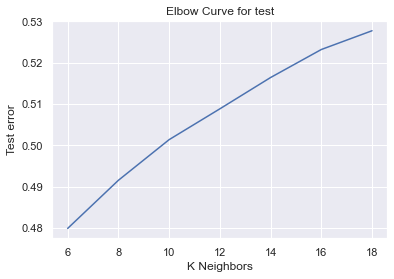

In [34]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

In [35]:
# Creating instance of KNN
clf = KNN(n_neighbors = 12)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 Score    ', k )

Test F1 Score     0.4911674024833112


# KNN Regression

In [36]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,trip_duration_hour,pickup_by_month,dropoff_by_month,pickup_day,dropoff_day,pickup_month,dropoff_month,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,2,1,-73.953918,40.778873,-73.963875,40.771164,400,0.111111,2,2,29,29,2,2,1,0
1,1,2,-73.988312,40.731743,-73.994751,40.694931,1100,0.305556,3,3,11,11,3,3,1,0
2,2,2,-73.997314,40.721458,-73.948029,40.774918,1635,0.454167,2,2,21,21,2,2,1,0
3,2,6,-73.961670,40.759720,-73.956779,40.780628,1141,0.316944,1,1,5,5,1,1,1,0
4,1,1,-74.017120,40.708469,-73.988182,40.740631,848,0.235556,2,2,17,17,2,2,1,0


In [37]:
#seperating independent and dependent variables
x = df.drop(['trip_duration'], axis=1)
y = df['trip_duration']
x.shape, y.shape

((729274, 15), (729274,))

In [38]:
# Importing MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [39]:
x = pd.DataFrame(x_scaled)

In [40]:
# Importing Train test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [41]:
#importing KNN regressor and metric mse
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [42]:
# Creating instance of KNN
reg = KNN(n_neighbors = 5)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating MSE
test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print('Test MSE    ', k )

Test MSE     82744.91415047253


In [43]:
def Elbow(K):
  #initiating empty list
    test_mse = []
  
  #training model for evey value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        #Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(test_x)
        tmp = mse(tmp,test_y)
        test_mse.append(tmp)
    
    return test_mse

In [44]:
#Defining K range
k = range(1,20)

In [ ]:
# calling above defined function
test = Elbow(k)

In [ ]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

In [ ]:
# Creating instance of KNN
reg = KNN(n_neighbors = 9)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print('Test MSE    ', k )